In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import json
from math import sqrt
%matplotlib notebook

In [2]:
prefix = "../build/"
# prefix = "./timeSqExp/testNaive/"


df = pd.read_csv(prefix+"data.csv")
df.columns = ['x', 'y', 'z', 'x_std', 'y_std', 'z_std','time']
df["x+"] = df["x"] + df["x_std"]
df["y+"] = df["y"] + df["y_std"]
df["z+"] = df["z"] + df["z_std"]
df["x-"] = df["x"] - df["x_std"]
df["y-"] = df["y"] - df["y_std"]
df["z-"] = df["z"] - df["z_std"]


In [3]:
path = pd.read_csv("path.csv")

print(path.tail())

df['gnd_x'] = path["x"] 
df['gnd_y'] = path["y"]
df['gnd_z'] = path["z"]

df.iloc[10]

      index         x         y         z
996     996 -0.263446 -0.067733  2.088647
997     997 -0.364201 -0.028504  2.140708
998     998 -0.454753  0.004004  2.182574
999     999 -0.537369  0.025985  2.214841
1000   1000 -0.615967  0.034738  2.237601


x           0.066993
y          -0.641186
z          -1.056550
x_std       0.003816
y_std       0.003137
z_std       0.003156
time     1724.000000
x+          0.070809
y+         -0.638049
z+         -1.053394
x-          0.063178
y-         -0.644323
z-         -1.059706
gnd_x       0.076027
gnd_y      -0.658572
gnd_z      -1.079498
Name: 10, dtype: float64

<IPython.core.display.Javascript object>


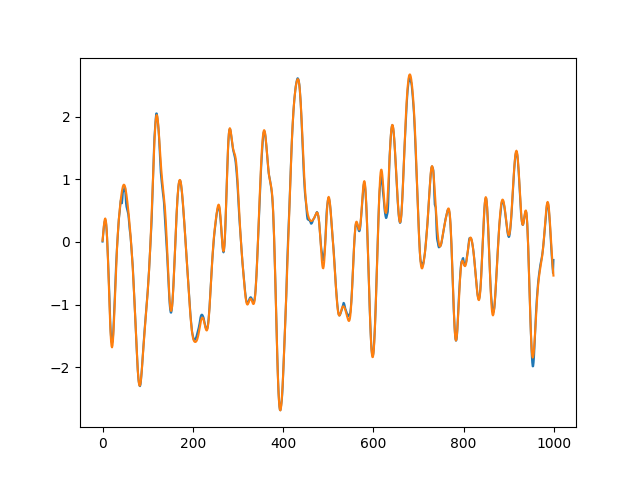

<IPython.core.display.Javascript object>


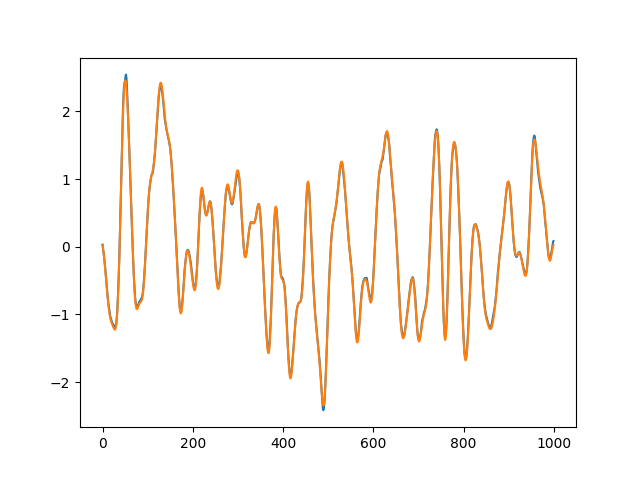

<IPython.core.display.Javascript object>


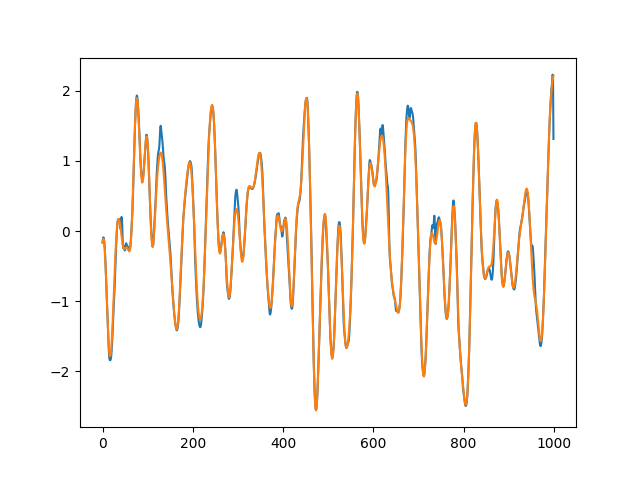

In [4]:
plt.plot(df.index, df['x'])
plt.fill_between(df.index, df['x+'], df['x-'], alpha=0.2)
plt.plot(df.index, df['gnd_x'])

plt.figure()

plt.plot(df.index, df['y'])
plt.fill_between(df.index, df['y+'], df['y-'], alpha=0.2)
plt.plot(df.index, df['gnd_y'])


plt.figure()
plt.plot(df.index, df['z'])
plt.fill_between(df.index, df['z+'], df['z-'], alpha=0.2)
plt.plot(df.index, df['gnd_z'])

plt.show()


0.01160917925308341


<IPython.core.display.Javascript object>


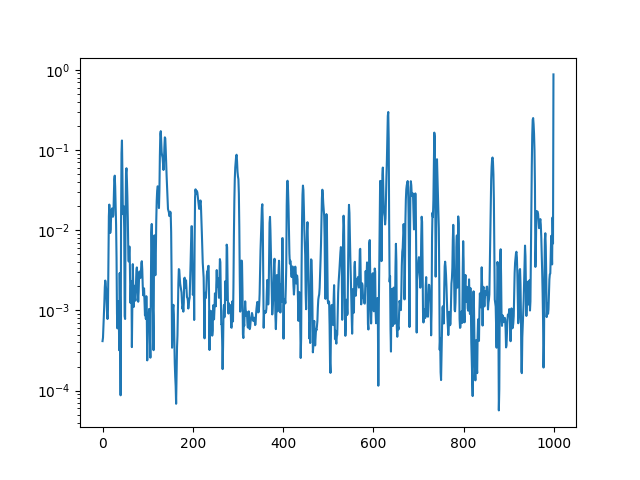

In [5]:
se = (df["x"]-df["gnd_x"])**2 + (df["y"]-df["gnd_y"])**2 + (df["z"]-df["gnd_z"])**2
mse = sum(se)/len(df['x'])
print(mse)
plt.figure()
plt.yscale("log")
plt.plot(df.index, se)
plt.show()

<IPython.core.display.Javascript object>


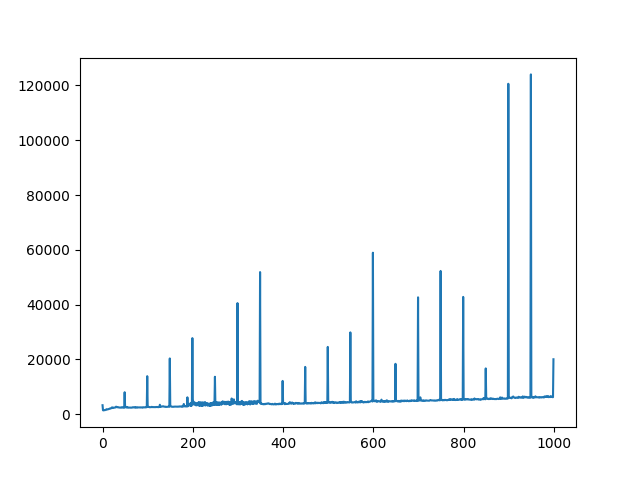

4.984481 s


In [6]:
plt.figure()
plt.plot(df.index, df['time'])
print(sum(df['time'])/10**6, "s")
plt.show()

In [7]:
# anchors = pd.read_csv(prefix+"anchors.csv")

with open("../anchors.json") as f:
    anchors = json.load(f)
    
x = [anchor["x"] for anchor in anchors]
y = [anchor["y"] for anchor in anchors]
z = [anchor["z"] for anchor in anchors]

anchors = list(zip(x,y,z))

print(anchors)

[(0.2295924093, 0.399465869, -0.1308412483), (0.4444741621, 1.044329596, 0.2238855489), (-1.452759572, -0.2844686453, -0.06650097861), (-0.8789321286, 0.4758329086, -0.3194972837), (-0.4262471963, -1.906303257, -0.8755651199), (-0.3168396336, -1.393621907, 0.9967660718), (1.279510548, -0.9905915016, 0.820967198), (-0.8952633563, -1.351065248, -0.5760774349), (-0.2295924093, -0.399465869, 0.1308412483), (-0.4444741621, -1.044329596, -0.2238855489), (1.452759572, 0.2844686453, 0.06650097861), (0.8789321286, -0.4758329086, 0.3194972837), (0.4262471963, 1.906303257, 0.8755651199), (0.3168396336, 1.393621907, -0.9967660718), (-1.279510548, 0.9905915016, -0.820967198), (0.8952633563, 1.351065248, 0.5760774349)]


<IPython.core.display.Javascript object>


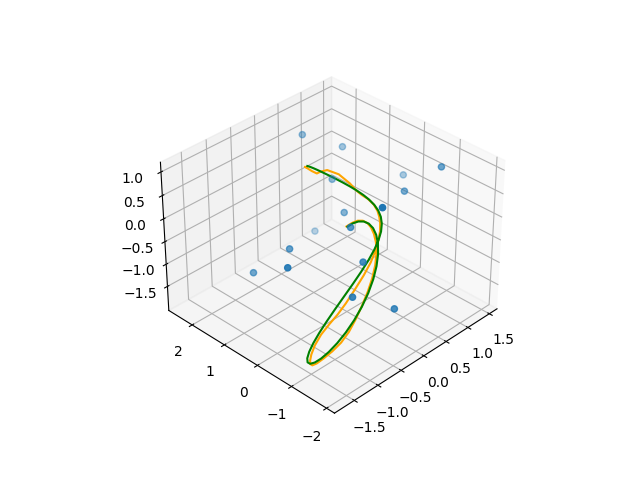

In [8]:
df_50 = df[:50]

ax = plt.figure().add_subplot(projection='3d')
ax.scatter(x,y,z)
ax.plot(df_50['x'],df_50['y'],df_50['z'], c="orange")
ax.plot(df_50['gnd_x'],df_50['gnd_y'],df_50['gnd_z'], c="green")



In [9]:
print(sum(df['time'])/10**6, "s")
print(se[len(se)-1])

4.984481 s
0.8766141749585734


In [10]:


dx = [sqrt((anchors[0][0] - df["gnd_x"][i])**2+(anchors[0][1] - df["gnd_y"][i])**2+(anchors[0][2] - df["gnd_z"][i])**2) for i in range (30)]
print(dx)


[0.4341569104181168, 0.4403154798899365, 0.4752948549062042, 0.5317489650318469, 0.6048865505596388, 0.6940297922624175, 0.8010495611381817, 0.9281464797702791, 1.0762388098829512, 1.2442878244381204, 1.4293274883526121, 1.6267941332753784, 1.8308790764417453, 2.0348260099139157, 2.231203381788125, 2.412226058467223, 2.570166900876676, 2.69786811105466, 2.7893179456235924, 2.8402328205995846, 2.84857073537801, 2.814900600147447, 2.7425584288483535, 2.6375344902185645, 2.508042889058197, 2.3637419155145496, 2.2145968515529018, 2.0694443706593026, 1.9344604671063566, 1.8119324799131902]


200 step fully connected
8953 ms
0.018081515014227126

200 step fully connected
21 ms
0.018128581248011585
